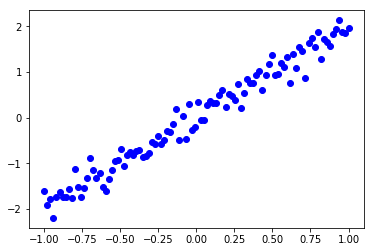

In [11]:
#随机生成一个有噪音的y=2x图

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

train_x=np.linspace(-1,1,100)
train_y=2*train_x+np.random.randn(train_x.shape[0])*0.2
#等同于
#train_y=2*train_x+np.random.randn(*train_x.shape)*0.2

plt.plot(train_x,train_y,'bo')

In [14]:
#正向模型搭建
#定义占位符
X=tf.placeholder("float32")
Y=tf.placeholder("float32")
#定义模型参数
W=tf.Variable(tf.random_normal([1]),name="wight")
b=tf.Variable(tf.zeros([1]),name="bias")
z=tf.multiply(W,X)+b

In [15]:
##反向模型搭建
cost=tf.reduce_mean(tf.square(Y-z))
learing_rate=0.001
optimizer=tf.train.GradientDescentOptimizer(learing_rate).minimize(cost)

Epoch= 1 cost= 0.8435198 W= [0.43762702] b= [0.01131339]
Epoch= 6 cost= 0.44828835 W= [0.8799518] b= [0.03811621]
Epoch= 11 cost= 0.24775663 W= [1.1952415] b= [0.04175337]
Epoch= 16 cost= 0.14594086 W= [1.4197644] b= [0.03867241]
Epoch= 21 cost= 0.09430532 W= [1.5795707] b= [0.03439838]
Epoch= 26 cost= 0.068145044 W= [1.6932851] b= [0.03059296]
Epoch= 31 cost= 0.05490024 W= [1.7741914] b= [0.02760482]
Epoch= 36 cost= 0.048197497 W= [1.8317508] b= [0.0253759]
Epoch= 41 cost= 0.044806603 W= [1.8726989] b= [0.02375237]
Epoch= 46 cost= 0.043091625 W= [1.9018303] b= [0.02258345]
Epoch= 51 cost= 0.042224664 W= [1.9225527] b= [0.02174681]
Epoch= 56 cost= 0.041786533 W= [1.9372948] b= [0.02114978]
Epoch= 61 cost= 0.041565254 W= [1.9477826] b= [0.02072432]
Epoch= 66 cost= 0.04145359 W= [1.9552441] b= [0.0204214]
Epoch= 71 cost= 0.04139733 W= [1.960551] b= [0.02020584]
Epoch= 76 cost= 0.041369017 W= [1.9643265] b= [0.02005245]
Epoch= 81 cost= 0.04135481 W= [1.967012] b= [0.01994333]
Epoch= 86 co

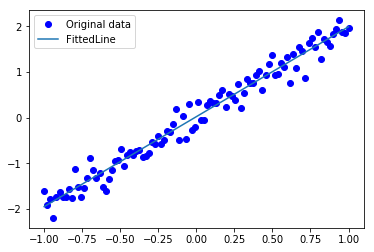

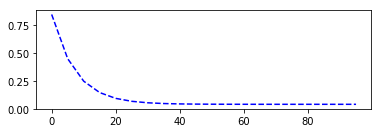

x=0.2,z= [0.41411164]


In [32]:
#迭代训练模型
init=tf.global_variables_initializer()

training_epochs=100
dispaly_step=5

with tf.Session() as sess:
    sess.run(init)
    
    plotdata={"batchsize":[],"loss":[]}
    
    for epoch in range(training_epochs):
        for (x,y) in zip(train_x,train_y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
        if epoch %dispaly_step==0:
            loss=sess.run(cost,feed_dict={X:train_x,Y:train_y})
            print("Epoch=",epoch+1,"cost=",loss,"W=",sess.run(W),"b=",sess.run(b))
            if not(loss=="NA"):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)
    print("finished!")
    print("cost=",sess.run(cost,feed_dict={X:train_x,Y:train_y}),"W=",sess.run(W),"b=",sess.run(b))
    
    plt.plot(train_x,train_y,'bo',label="Original data")
    plt.plot(train_x,sess.run(W)*train_x+sess.run(b),label="FittedLine")
    plt.legend()
    plt.show()
    
   # plotdata["avgloss"]=moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"],plotdata["loss"],"b--")
    plt.show()
    
    
    print("x=0.2,z=",sess.run(z,feed_dict={X:0.2}))